In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv("archive/melb_data.csv")

data = df[['Price', 'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
data.head()

,Price,Rooms,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,1480000.0,2,2.0,1.0,1.0,202.0,NaN,NaN
1,1035000.0,2,2.0,1.0,0.0,156.0,79.0,1900.0
2,1465000.0,3,3.0,2.0,0.0,134.0,150.0,1900.0
3,850000.0,3,3.0,2.0,1.0,94.0,NaN,NaN
4,1600000.0,4,3.0,1.0,2.0,120.0,142.0,2014.0


In [10]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6830 entries, 1 to 13579
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         6830 non-null   float64
 1   Rooms         6830 non-null   int64  
 2   Bedroom2      6830 non-null   float64
 3   Bathroom      6830 non-null   float64
 4   Car           6830 non-null   float64
 5   Landsize      6830 non-null   float64
 6   BuildingArea  6830 non-null   float64
 7   YearBuilt     6830 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 480.2 KB


In [11]:
data.describe()

,Price,Rooms,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,6.830000e+03,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000
mean,1.077604e+06,2.978184,2.951391,1.594143,1.606881,487.495461,143.446606,1964.444070
std,6.733202e+05,0.970479,0.970789,0.714366,0.944613,910.805627,89.970692,37.706332
min,1.310000e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000
25%,6.300000e+05,2.000000,2.000000,1.000000,1.000000,167.000000,93.000000,1940.000000
50%,8.900000e+05,3.000000,3.000000,1.000000,2.000000,404.000000,126.000000,1970.000000
75%,1.334000e+06,4.000000,4.000000,2.000000,2.000000,641.000000,173.000000,2000.000000
max,9.000000e+06,8.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000


In [17]:
data = data.drop(data[data['YearBuilt'] < 1800].index, axis=0)

/home/gardin/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='YearBuilt'>

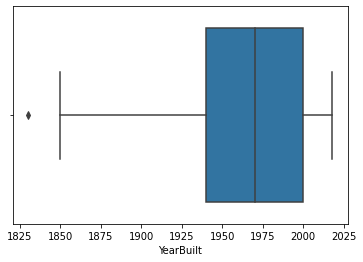

In [18]:
sns.boxplot(data.YearBuilt)

In [19]:
data = data.dropna()
data.shape

(6829, 8)

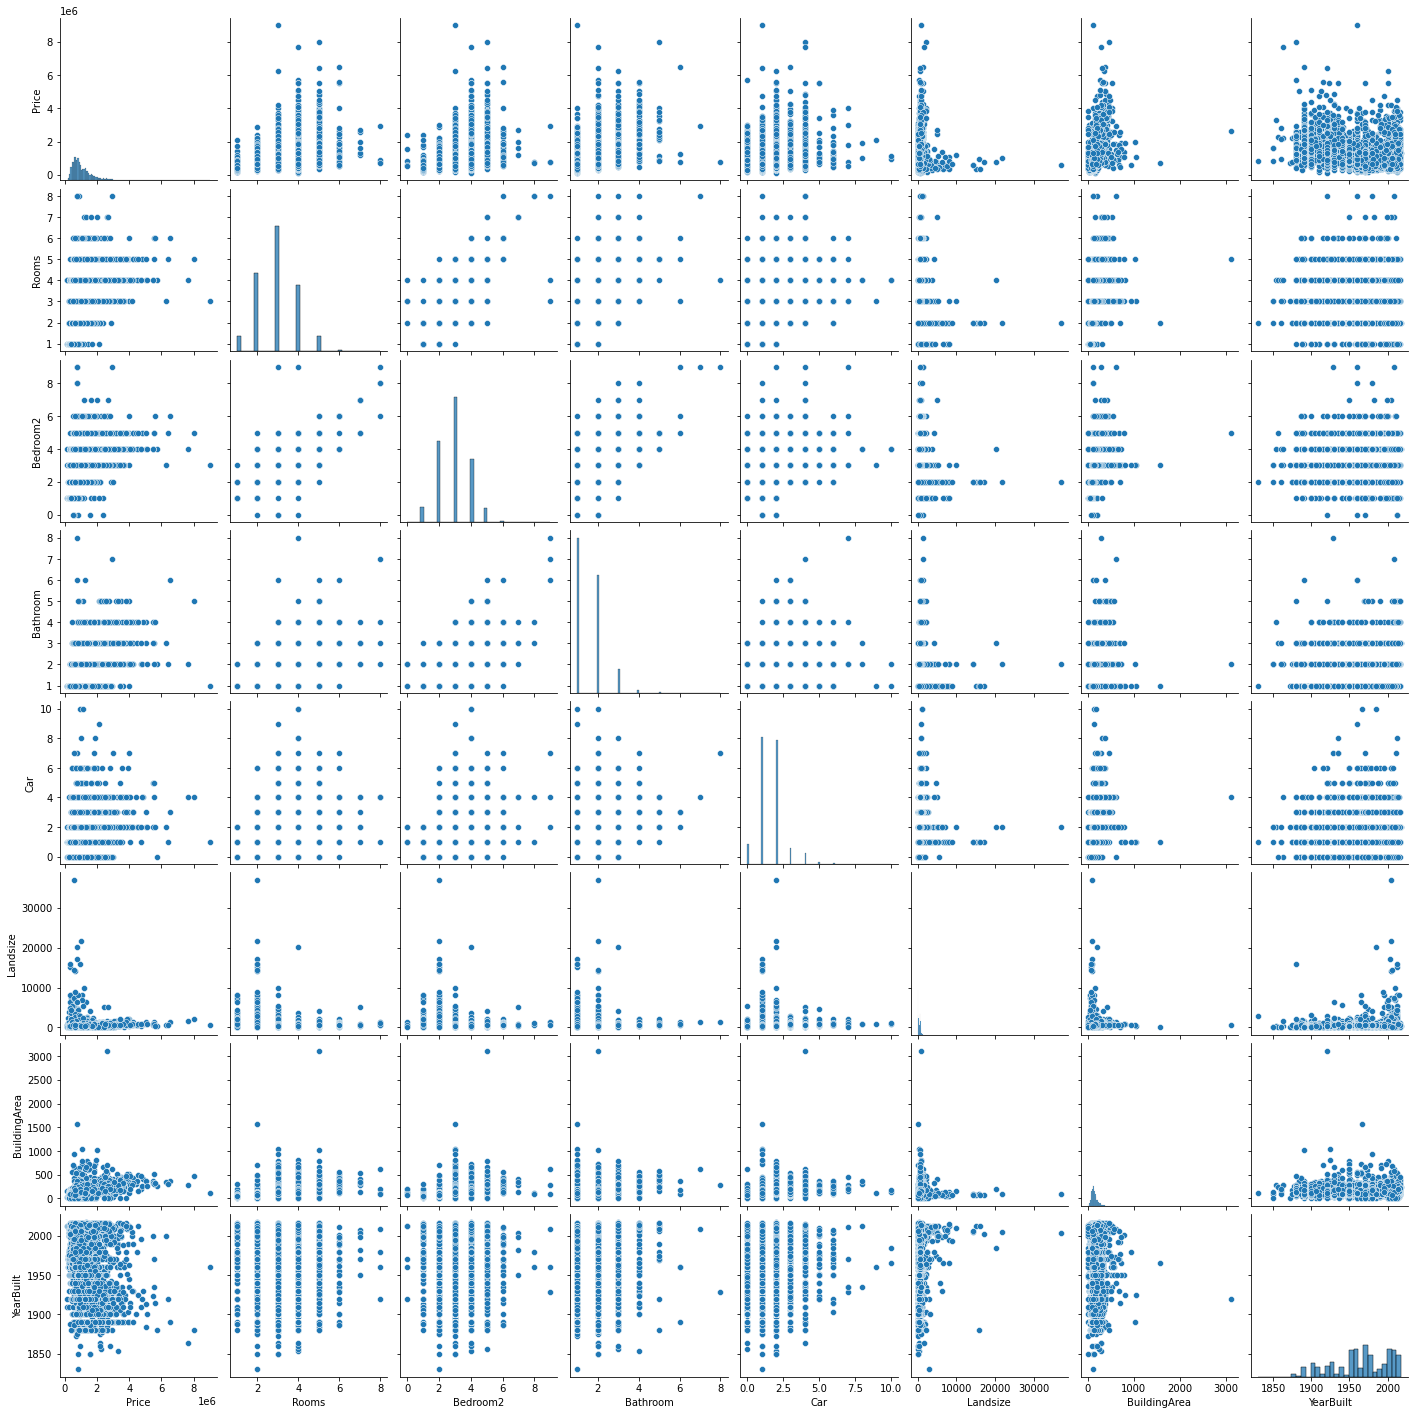

In [20]:
sns.pairplot(data)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']], data.Price, test_size=.2, random_state=1)


In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
lr.intercept_

13437238.805065485

In [26]:
y_pred = lr.predict(x_test)

In [27]:
lr.coef_

array([ 1.11390573e+05, -2.32787045e+04,  3.10849631e+05,  3.56029779e+04,
        1.12051625e+01,  1.78862980e+03, -6.84049624e+03])

In [28]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test, y_pred))
print(metrics.r2_score(y_train, lr.predict(x_train)))

270155137734.0629
0.4972347712087508


In [30]:
import statsmodels.api as sm

x_stat = sm.add_constant(x_train)
ols = sm.OLS(y_train, x_stat)
m = ols.fit()

In [31]:
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     770.7
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:11:08   Log-Likelihood:                -79104.
No. Observations:                5463   AIC:                         1.582e+05
Df Residuals:                    5455   BIC:                         1.583e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.344e+07   3.59e+05     37.398   